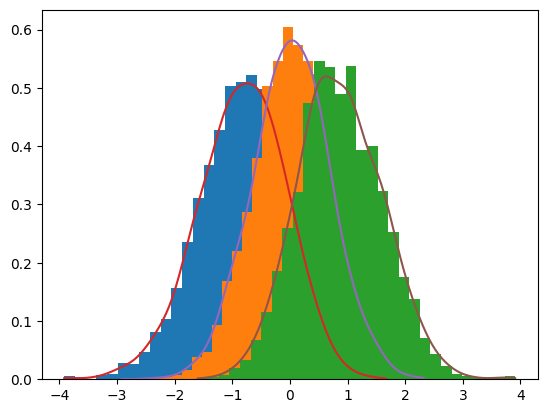

In [4]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt



def get_gaussian_density(dataset):
    ''' Гауссово распределение, полученное на основе выборки

        :param dataset: массив значений
    '''

    density = ss.gaussian_kde(dataset)
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()

    min_x, max_x = np.percentile(dataset, [0, 100])

    return np.linspace(min_x, max_x, 200), density




mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины


# Случайно выбираем по 3 пробы, сортируем их
random_samples = (
  sorted(np.random.choice(rnd, 3))
  for i in range(10000)
)

# Zip функция - без комментариев (функциональное программирование, есть на Вики)
# на выходе получаем массивы минимальных, средних и максимальных значений
rnd1, rnd2, rnd3 = zip(*random_samples)


# Гистограмма частот распределения случайной величины (опционально)
counts_1, x_range_1, ignored = plt.hist(rnd1, 30, density=True, histtype='barstacked')
counts_2, x_range_2, ignored = plt.hist(rnd2, 30, density=True, histtype='barstacked')
counts_3, x_range_3, ignored = plt.hist(rnd3, 30, density=True, histtype='barstacked')


# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)


plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))


plt.show()